In [1]:
import pandas as pd
# import metadata
metadata = pd.read_csv('../data/metadata.csv')
metadata.head()

,participant,bilingual,spanish,french,german,other
0,1,0,0,0,0,0
1,2,1,0,0,0,1
2,3,0,0,0,0,0
3,4,1,0,1,0,1
4,5,0,0,0,0,0


In [2]:
# make a list of speakers per language
eng = []        # people who only speak english
esp = []
fr = []
ger = []
only_other = [] # people who only speak other languages
other = []

for index, row in metadata.iterrows():
    if row['spanish'] == 1:
        esp.append(index + 1)
    elif row['french'] == 1:
        fr.append(index + 1)
    elif row['german'] == 1:
        ger.append(index + 1)
    elif row['other'] == 1:
        only_other.append(index + 1)
        # continue
    else:
        eng.append(index + 1)

for index, row in metadata.iterrows():
    if row['other'] == 1:
        other.append(index + 1)


# print(len(eng), len(esp), len(fr), len(ger), len(other), len(only_other))
# print(eng)
# print(esp)
# print(fr)
# print(ger)
# print(other)
# print(only_other)
#############################################################################
# eng has 20 speakers
# [1, 3, 5, 6, 7, 8, 9, 11, 20, 24, 25, 27, 29, 30, 32, 34, 36, 37, 38, 40]
# esp has 10 speakers
# [10, 13, 14, 15, 16, 17, 19, 31, 35, 39]
# fr has 5 speakers
# [4, 12, 23, 26, 33]
# ger has 4 speakers
# [18, 21, 22, 28]
# other has 7 speakers
# [2, 4, 10, 13, 15, 23, 33]
# only_other has 1 speaker
# [2]
# total 40 speakers with 6 overlap

In [3]:
# make a list of factors I want to consider
# factors = ['Fp1', 'Fpz', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FC5', 'FC1', 'FC2', 'FC6']
# factors = ['CP5', 'P7', 'P3']
factors = ['P4', 'P8', 'POz', 'O2', 'Pz']
# factors = ['Cz']
# factors = ['Fp1', 'Fpz', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FC5', 'FC1', 'FC2', 'FC6', 'T7', 'C3', 'Cz', 'C4', 'T8', 'CP5', 'CP1', 'CP2', 'CP6', 'P7', 'P3', 'Pz', 'P4', 'P8', 'POz', 'O1', 'Oz', 'O2']
# factors = ['P7', 'P3', 'Pz', 'P4', 'P8', 'POz', 'O1', 'Oz', 'O2']

In [4]:
# import measured data
import os
files =  os.listdir('../data/EEG_Measurements')
spanish_bilinguals_know = []
spanish_bilinguals_dontknow = []
for file in files:
    # print(file.split('_')[-1][:-4])
    if int(file.split('_')[-1][:-4]) in esp:
        if 'engllish-english' in file:
            if 'translation' in file:
                spanish_bilinguals_know.append(file)
            else:
                spanish_bilinguals_dontknow.append(file)
        elif 'english-spanish' in file:
            if 'translation' in file:
                spanish_bilinguals_know.append(file)
            else:
                spanish_bilinguals_dontknow.append(file)
        if 'spanish-english' in file:
            if 'translation' in file:
                spanish_bilinguals_know.append(file)
            else:
                spanish_bilinguals_dontknow.append(file)
        if 'spanish-spanish' in file:
            if 'translation' in file:
                spanish_bilinguals_know.append(file)
            else:
                spanish_bilinguals_dontknow.append(file)
        

print(spanish_bilinguals_know)
print(spanish_bilinguals_dontknow)
# print(not_spanish_bilinguals)

['watch_spanish-spanish_translation_15.csv', 'knife_spanish-spanish_translation_39.csv', 'room_spanish-spanish_translation_39.csv', 'ground_spanish-english_translation_35.csv', 'book_spanish-english_translation_13.csv', 'garlic_spanish-english_translation_13.csv', 'rain_english-spanish_translation_16.csv', 'face_english-spanish_translation_31.csv', 'daughter_spanish-english_translation_19.csv', 'daughter_spanish-english_translation_31.csv', 'pillow_spanish-english_translation_10.csv', 'face_english-spanish_translation_19.csv', 'pocket_spanish-english_translation_39.csv', 'watch_english-spanish_translation_16.csv', 'food_english-spanish_translation_10.csv', 'neighbor_english-spanish_translation_35.csv', 'place_spanish-english_translation_16.csv', 'laughter_spanish-spanish_translation_39.csv', 'wall_spanish-spanish_translation_19.csv', 'wall_spanish-spanish_translation_31.csv', 'laughter_spanish-spanish_translation_10.csv', 'rain_spanish-spanish_translation_14.csv', 'place_spanish-englis

In [5]:
all_spanish_bilinguals = []

for file in spanish_bilinguals_know:
    df = pd.read_csv(f'../data/EEG_Measurements/{file}')
    
    selected_columns = [col for col in df.columns if col in factors]
    df_selected = df[selected_columns]
    
    all_spanish_bilinguals.append(df_selected)

final_df = pd.concat(all_spanish_bilinguals, axis=1, ignore_index=True)
final_df.head()

,0,1,2,3,4,5,6,7,8,9,...,3960,3961,3962,3963,3964,3965,3966,3967,3968,3969
0,2.713898,-3.857832,9.219727,0.300316,-6.841047,-3.361023,-4.188621,-5.83552,-1.044492,0.32991,...,11.082863,11.792488,28.386766,7.351363,9.193492,9.697457,7.282207,5.03002,9.01441,9.957961
1,2.658898,-2.878832,9.394727,2.326316,-3.680047,-1.880023,-2.724621,-4.40152,0.072508,0.65491,...,10.878863,11.694488,30.527766,7.928363,9.952492,10.183457,5.225207,1.09302,9.05241,9.541961
2,2.545898,-2.180832,10.001727,3.643316,-1.513047,-0.350023,-1.689621,-3.79852,1.236508,0.31491,...,10.605863,11.318488,32.554766,8.359363,10.427492,11.021457,4.597207,-0.96298,9.46141,9.228961
3,2.270898,-1.955832,10.949727,4.011316,-0.597047,1.233977,-1.016621,-4.00252,2.382508,-0.64709,...,10.283863,10.709488,34.365766,8.459363,10.605492,12.126457,5.373207,-1.00398,10.02841,8.922961
4,1.687898,-2.400832,11.903727,3.294316,-0.986047,2.787977,-0.528621,-4.73952,3.397508,-1.94409,...,9.984863,9.980488,35.894766,8.019363,10.561492,13.242457,7.052207,0.53402,10.37041,8.429961


In [6]:
final_df['average'] = final_df.mean(axis=1)
know_average = final_df['average'][0:25].mean()
print(know_average)
final_df['average'] -= know_average
final_df['average'].head()

-2.7012878163176954


/var/folders/ws/fxhfdd8x2f5fctj1jzjsdssm0000gn/T/ipykernel_42479/3492397323.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final_df['average'] = final_df.mean(axis=1)


0    0.022196
1    0.034017
2    0.025262
3   -0.015383
4   -0.091194
Name: average, dtype: float64

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# plt.figure(figsize=(10, 6))
# plt.plot(final_df['average'])
# plt.title('Average Values Over Time')
# plt.xlabel('Index')
# plt.ylabel('Average Value')
# plt.show()

In [8]:
all_not_spanish_bilinguals = []

for file in spanish_bilinguals_dontknow:
    df = pd.read_csv(f'../data/EEG_Measurements/{file}')
    
    selected_columns = [col for col in df.columns if col in factors]
    df_selected = df[selected_columns]
    
    all_not_spanish_bilinguals.append(df_selected)

final_not_df = pd.concat(all_not_spanish_bilinguals, axis=1, ignore_index=True)
final_not_df.head()

,0,1,2,3,4,5,6,7,8,9,...,3315,3316,3317,3318,3319,3320,3321,3322,3323,3324
0,1.495496,-3.166715,-1.360773,-4.319352,0.047777,-26.400781,-21.338215,-17.473031,-12.696848,-18.167805,...,-15.025863,-14.438867,-8.412187,-15.265105,-15.859656,6.387688,10.462207,8.089355,3.952473,4.147445
1,1.070496,-3.488715,-1.428773,-3.999352,0.431777,-23.466781,-19.718215,-18.075031,-11.114848,-18.230805,...,-16.323863,-15.971867,-11.189187,-16.285105,-17.532656,5.346687,9.013207,7.213355,2.555473,2.871445
2,1.005496,-3.403715,-1.286773,-3.625352,0.795777,-21.314781,-18.638215,-17.631031,-9.875848,-18.130805,...,-17.400863,-16.943867,-12.748188,-17.423105,-18.375656,4.696688,7.829207,6.275355,1.804473,2.088445
3,1.147496,-3.036715,-0.973773,-3.379352,1.091777,-19.997781,-18.231215,-16.183031,-9.098848,-17.967805,...,-18.227863,-17.375867,-13.109188,-18.597105,-18.396656,4.490687,6.988207,5.325355,1.802473,1.916445
4,1.238496,-2.649715,-0.599773,-3.464352,1.271777,-19.385781,-18.477215,-14.153031,-8.865848,-17.936805,...,-18.738863,-17.368867,-12.577188,-19.557105,-17.784656,4.656688,6.491207,4.477355,2.483473,2.360445


In [9]:
final_not_df['average'] = final_not_df.mean(axis=1)
dontknow_average = final_not_df['average'][0:25].mean()
final_not_df['average'] -= dontknow_average
final_not_df['average']

/var/folders/ws/fxhfdd8x2f5fctj1jzjsdssm0000gn/T/ipykernel_42479/3938763346.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final_not_df['average'] = final_not_df.mean(axis=1)


0     -0.053860
1     -0.058163
2     -0.019317
3      0.047161
4      0.106939
         ...   
251    3.552510
252    3.565509
253    3.552992
254    3.526511
255    3.526511
Name: average, Length: 256, dtype: float64

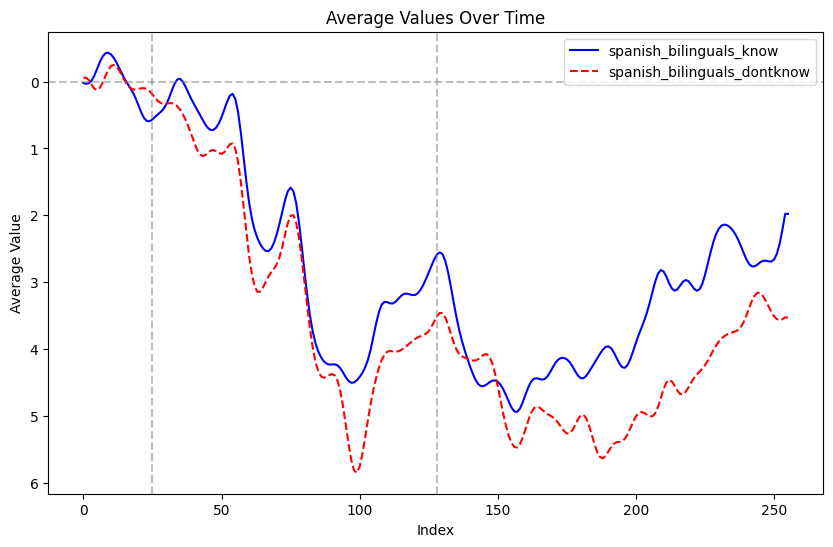

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(final_df['average'], label='spanish_bilinguals_know', color='blue', linestyle='-')
plt.plot(final_not_df['average'], label='spanish_bilinguals_dontknow', color='red', linestyle='--')
plt.title('Average Values Over Time')
plt.xlabel('Index')
plt.ylabel('Average Value')
plt.gca().invert_yaxis()
plt.axvline(x=25, color='gray', linestyle='--', alpha=0.5)
plt.axvline(x=128, color='gray', linestyle='--', alpha=0.5)
plt.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
plt.legend()
plt.show()

In [11]:
# make a dictionary for the participant language category
participant_language_category = {}
for index, row in metadata.iterrows():
    participant_language_category[index + 1] = [row['bilingual'], row['spanish'], row['french'], row['german'], row['other']]
print(participant_language_category)
participant_language_category[1]

{1: [0, 0, 0, 0, 0], 2: [1, 0, 0, 0, 1], 3: [0, 0, 0, 0, 0], 4: [1, 0, 1, 0, 1], 5: [0, 0, 0, 0, 0], 6: [0, 0, 0, 0, 0], 7: [0, 0, 0, 0, 0], 8: [0, 0, 0, 0, 0], 9: [0, 0, 0, 0, 0], 10: [1, 1, 0, 0, 1], 11: [0, 0, 0, 0, 0], 12: [1, 0, 1, 0, 0], 13: [1, 1, 0, 0, 1], 14: [1, 1, 0, 0, 0], 15: [1, 1, 0, 0, 1], 16: [1, 1, 0, 0, 0], 17: [1, 1, 0, 0, 0], 18: [1, 0, 0, 1, 0], 19: [1, 1, 0, 0, 0], 20: [0, 0, 0, 0, 0], 21: [1, 0, 0, 1, 0], 22: [1, 0, 0, 1, 0], 23: [1, 0, 1, 0, 1], 24: [0, 0, 0, 0, 0], 25: [0, 0, 0, 0, 0], 26: [1, 0, 1, 0, 0], 27: [0, 0, 0, 0, 0], 28: [1, 0, 0, 1, 0], 29: [0, 0, 0, 0, 0], 30: [0, 0, 0, 0, 0], 31: [1, 1, 0, 0, 0], 32: [0, 0, 0, 0, 0], 33: [1, 0, 1, 0, 1], 34: [0, 0, 0, 0, 0], 35: [1, 1, 0, 0, 0], 36: [0, 0, 0, 0, 0], 37: [0, 0, 0, 0, 0], 38: [0, 0, 0, 0, 0], 39: [1, 1, 0, 0, 0], 40: [0, 0, 0, 0, 0]}


[0, 0, 0, 0, 0]

In [12]:
# make a dictionary for the participant spanish category
participant_spanish_category = {}
for index, row in metadata.iterrows():
    participant_spanish_category[index + 1] = [row['spanish']]
print(participant_spanish_category)
# participant_language_category[1]

{1: [0], 2: [0], 3: [0], 4: [0], 5: [0], 6: [0], 7: [0], 8: [0], 9: [0], 10: [1], 11: [0], 12: [0], 13: [1], 14: [1], 15: [1], 16: [1], 17: [1], 18: [0], 19: [1], 20: [0], 21: [0], 22: [0], 23: [0], 24: [0], 25: [0], 26: [0], 27: [0], 28: [0], 29: [0], 30: [0], 31: [1], 32: [0], 33: [0], 34: [0], 35: [1], 36: [0], 37: [0], 38: [0], 39: [1], 40: [0]}


In [14]:
# make a dictionary for the participant results
import os
files =  os.listdir('../data/EEG_Measurements')
participant_results = {}
for i in range(1, 41):
    temp_list = []
    for file in files:
        # print(int(file.split('_')[-1][:-4]))
        if (int(file.split('_')[-1][:-4]) == i):
            temp_list.append(file)
    participant_results[i] = temp_list

print(participant_results)

{1: ['neck_english-english_translation_1.csv', 'chair_english-french_unrelated_1.csv', 'face_english-spanish_unrelated_1.csv', 'ground_spanish-spanish_unrelated_1.csv', 'ground_english-german_unrelated_1.csv', 'wall_english-german_unrelated_1.csv', 'laughter_german-german_translation_1.csv', 'yesterday_english-spanish_unrelated_1.csv', 'knife_german-english_translation_1.csv', 'lawyer_english-french_unrelated_1.csv', 'happiness_english-english_unrelated_1.csv', 'neck_spanish-spanish_unrelated_1.csv', 'neighbor_english-german_unrelated_1.csv', 'yesterday_english-french_unrelated_1.csv', 'shoe_french-english_unrelated_1.csv', 'pocket_french-english_unrelated_1.csv', 'ground_german-german_translation_1.csv', 'book_french-english_translation_1.csv', 'skin_spanish-english_translation_1.csv', 'neck_spanish-english_translation_1.csv', 'pillow_english-french_unrelated_1.csv', 'leaf_english-english_unrelated_1.csv', 'laughter_spanish-spanish_unrelated_1.csv', 'knife_french-french_translation_1.

In [15]:
for i in range(1, 41):
    print(participant_results[i])
    print(len(participant_results[i]))

['neck_english-english_translation_1.csv', 'chair_english-french_unrelated_1.csv', 'face_english-spanish_unrelated_1.csv', 'ground_spanish-spanish_unrelated_1.csv', 'ground_english-german_unrelated_1.csv', 'wall_english-german_unrelated_1.csv', 'laughter_german-german_translation_1.csv', 'yesterday_english-spanish_unrelated_1.csv', 'knife_german-english_translation_1.csv', 'lawyer_english-french_unrelated_1.csv', 'happiness_english-english_unrelated_1.csv', 'neck_spanish-spanish_unrelated_1.csv', 'neighbor_english-german_unrelated_1.csv', 'yesterday_english-french_unrelated_1.csv', 'shoe_french-english_unrelated_1.csv', 'pocket_french-english_unrelated_1.csv', 'ground_german-german_translation_1.csv', 'book_french-english_translation_1.csv', 'skin_spanish-english_translation_1.csv', 'neck_spanish-english_translation_1.csv', 'pillow_english-french_unrelated_1.csv', 'leaf_english-english_unrelated_1.csv', 'laughter_spanish-spanish_unrelated_1.csv', 'knife_french-french_translation_1.csv'

In [16]:
# make a list of combinations of tests
# start with word
word_set = set()
word_list = []
for name in participant_results[1]:
    word_set.add(name.split('_')[0])
print(word_set)
len(word_set)
for word in word_set:
    word_list.append(word)
word_list.sort()
print(word_list)

{'face', 'wood', 'yesterday', 'place', 'daughter', 'cloud', 'pillow', 'neck', 'mouth', 'nephew', 'happiness', 'chair', 'ground', 'laughter', 'non-english', 'watch', 'city', 'skin', 'book', 'pocket', 'neighbor', 'room', 'rain', 'food', 'shoe', 'leaf', 'knife', 'flour', 'wall', 'garlic', 'lawyer'}
['book', 'chair', 'city', 'cloud', 'daughter', 'face', 'flour', 'food', 'garlic', 'ground', 'happiness', 'knife', 'laughter', 'lawyer', 'leaf', 'mouth', 'neck', 'neighbor', 'nephew', 'non-english', 'pillow', 'place', 'pocket', 'rain', 'room', 'shoe', 'skin', 'wall', 'watch', 'wood', 'yesterday']


In [17]:
# language
language_list = ['english', 'spanish', 'french', 'german']
language_list.sort()
print(language_list)

['english', 'french', 'german', 'spanish']


In [18]:
# language combination
language_combination_list = []
for language1 in language_list:
    for language2 in language_list:
        if language1 == language2:
            language_combination_list.append((language1 + '-' + language2))
        elif language1 != language2 and language1 == 'english':
            language_combination_list.append((language1 + '-' + language2))
        elif language1 != language2 and language2 == 'english':
            language_combination_list.append((language1 + '-' + language2))
        else:
            # language_combination_list.append((language1 + '-' + language2))
            continue
print(language_combination_list)
len(language_combination_list)

['english-english', 'english-french', 'english-german', 'english-spanish', 'french-english', 'french-french', 'german-english', 'german-german', 'spanish-english', 'spanish-spanish']


10

In [19]:
# relation
relation_list = ['translation', 'unrelated']
relation_list.sort()
print(relation_list)

['translation', 'unrelated']


In [20]:
# possible combinations
possible_combinations = []
for word in word_list:
    for language in language_combination_list:
        for relation in relation_list:
            possible_combinations.append((word + '_' + language + '_' + relation))
print(possible_combinations)
len(possible_combinations)

['book_english-english_translation', 'book_english-english_unrelated', 'book_english-french_translation', 'book_english-french_unrelated', 'book_english-german_translation', 'book_english-german_unrelated', 'book_english-spanish_translation', 'book_english-spanish_unrelated', 'book_french-english_translation', 'book_french-english_unrelated', 'book_french-french_translation', 'book_french-french_unrelated', 'book_german-english_translation', 'book_german-english_unrelated', 'book_german-german_translation', 'book_german-german_unrelated', 'book_spanish-english_translation', 'book_spanish-english_unrelated', 'book_spanish-spanish_translation', 'book_spanish-spanish_unrelated', 'chair_english-english_translation', 'chair_english-english_unrelated', 'chair_english-french_translation', 'chair_english-french_unrelated', 'chair_english-german_translation', 'chair_english-german_unrelated', 'chair_english-spanish_translation', 'chair_english-spanish_unrelated', 'chair_french-english_translati

620

In [21]:
# combine the results
electrode_columns = ['Fp1', 'Fpz', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FC5', 'FC1', 'FC2', 'FC6', 'T7', 'C3', 'Cz', 'C4', 'T8', 'CP5', 'CP1', 'CP2', 'CP6', 'P7', 'P3', 'Pz', 'P4', 'P8', 'POz', 'O1', 'Oz', 'O2']
# electrode_columns = ['P4', 'P8', 'POz', 'O2', 'Pz']
# electrode_columns = ['P4', 'P8', 'POz', 'O2', 'Pz', 'CP2', 'CP6']
default_df = pd.DataFrame(0, index=range(256), columns=electrode_columns)
result_dataframes = [] # list of dataframes
for i in range(1, 41):
    temp_df = pd.DataFrame()
    for combination in possible_combinations:
        added_df = False
        for file in participant_results[i]:
            if combination in file:
                df = pd.read_csv(f'../data/EEG_Measurements/{file}')
                selected_columns = [col for col in df.columns if col in electrode_columns]  
                df_selected = df[selected_columns]
                temp_df = pd.concat([temp_df, df_selected], axis=0)
                added_df = True
        if added_df == False:
            temp_df = pd.concat([temp_df, default_df], axis=0)
    result_dataframes.append(temp_df)
    

In [22]:
result_dataframes[0]

,Fp1,Fpz,Fp2,F7,F3,Fz,F4,F8,FC5,FC1,...,CP6,P7,P3,Pz,P4,P8,POz,O1,Oz,O2
0,0.105563,-10.123230,-13.193379,6.893438,-7.629562,28.292086,2.719152,-2.486754,-6.934687,-7.466992,...,-4.767598,-1.546625,-12.672410,-15.553527,-6.628602,2.177121,-12.258789,5.257230,0.080961,-1.445801
1,-3.794437,-9.431230,-12.219379,1.226438,-13.299563,13.985086,-1.569848,-7.682754,-4.498687,-8.062992,...,-3.226598,-2.437625,-12.575410,-15.718527,-5.548602,4.545121,-12.626789,4.125230,-0.084039,0.799199
2,-7.023438,-9.685230,-12.414379,-2.416562,-17.288563,6.112086,-3.922848,-10.316754,-3.801687,-8.833992,...,-2.291598,-4.136625,-13.252410,-16.214527,-5.214602,5.249121,-13.392789,2.746230,-0.500039,2.292199
3,-9.825437,-11.147230,-13.928379,-4.398562,-20.232563,3.905086,-4.680848,-10.806754,-4.979687,-10.249992,...,-2.124598,-6.539625,-14.651410,-17.082527,-5.590602,4.145121,-14.575789,1.150230,-1.167039,3.052199
4,-12.493438,-13.672230,-16.416379,-5.623563,-23.102563,4.827086,-4.590848,-10.200754,-7.615687,-12.606992,...,-2.626598,-9.277625,-16.380410,-18.129527,-6.305602,1.752121,-15.943789,-0.458770,-1.918039,3.352199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,-6.676078,-11.970117,-18.197750,-0.869898,-4.288203,-9.323461,-15.099520,-12.790973,-3.640359,-9.579047,...,-18.466625,-2.740289,-9.894164,-7.858539,-15.019301,-15.327449,-12.985293,-2.121434,-7.513691,-10.222480
252,-6.015078,-12.165117,-20.119750,-2.972898,-5.856203,-11.137461,-17.189520,-18.052973,-3.953359,-10.291047,...,-20.431625,-1.787289,-9.830164,-9.148539,-16.424301,-15.623449,-13.952293,-2.483434,-6.738691,-9.998480
253,-5.410078,-12.676117,-21.327750,-6.026898,-8.287203,-13.426461,-20.386520,-24.553973,-4.224359,-11.053047,...,-22.594625,-0.422289,-9.863164,-10.342539,-17.597301,-15.612449,-14.961293,-3.301434,-6.192691,-8.900480
254,-4.804078,-13.310117,-21.817750,-9.601898,-11.112203,-15.850461,-24.150520,-31.651973,-4.353359,-11.764047,...,-24.784625,1.257711,-9.877164,-11.407539,-18.544301,-15.320449,-15.918293,-4.313434,-5.728691,-7.151480


In [23]:
# make a list of average values
average_dataframes = []
for df in result_dataframes:
    temp_df = pd.DataFrame(df.mean(axis=1), columns=['Average'])
    offset = temp_df[0:26].mean()
    temp_df -= offset
    average_dataframes.append(temp_df)
len(average_dataframes)

40

In [24]:
average_dataframes[0]

,Average
0,3.210119
1,1.517119
2,-0.102747
3,-1.794214
4,-3.587781
...,...
251,-4.982632
252,-6.018332
253,-7.294832
254,-8.623365


In [25]:
len(result_dataframes)

40

In [26]:
result_dataframes[0]

,Fp1,Fpz,Fp2,F7,F3,Fz,F4,F8,FC5,FC1,...,CP6,P7,P3,Pz,P4,P8,POz,O1,Oz,O2
0,0.105563,-10.123230,-13.193379,6.893438,-7.629562,28.292086,2.719152,-2.486754,-6.934687,-7.466992,...,-4.767598,-1.546625,-12.672410,-15.553527,-6.628602,2.177121,-12.258789,5.257230,0.080961,-1.445801
1,-3.794437,-9.431230,-12.219379,1.226438,-13.299563,13.985086,-1.569848,-7.682754,-4.498687,-8.062992,...,-3.226598,-2.437625,-12.575410,-15.718527,-5.548602,4.545121,-12.626789,4.125230,-0.084039,0.799199
2,-7.023438,-9.685230,-12.414379,-2.416562,-17.288563,6.112086,-3.922848,-10.316754,-3.801687,-8.833992,...,-2.291598,-4.136625,-13.252410,-16.214527,-5.214602,5.249121,-13.392789,2.746230,-0.500039,2.292199
3,-9.825437,-11.147230,-13.928379,-4.398562,-20.232563,3.905086,-4.680848,-10.806754,-4.979687,-10.249992,...,-2.124598,-6.539625,-14.651410,-17.082527,-5.590602,4.145121,-14.575789,1.150230,-1.167039,3.052199
4,-12.493438,-13.672230,-16.416379,-5.623563,-23.102563,4.827086,-4.590848,-10.200754,-7.615687,-12.606992,...,-2.626598,-9.277625,-16.380410,-18.129527,-6.305602,1.752121,-15.943789,-0.458770,-1.918039,3.352199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,-6.676078,-11.970117,-18.197750,-0.869898,-4.288203,-9.323461,-15.099520,-12.790973,-3.640359,-9.579047,...,-18.466625,-2.740289,-9.894164,-7.858539,-15.019301,-15.327449,-12.985293,-2.121434,-7.513691,-10.222480
252,-6.015078,-12.165117,-20.119750,-2.972898,-5.856203,-11.137461,-17.189520,-18.052973,-3.953359,-10.291047,...,-20.431625,-1.787289,-9.830164,-9.148539,-16.424301,-15.623449,-13.952293,-2.483434,-6.738691,-9.998480
253,-5.410078,-12.676117,-21.327750,-6.026898,-8.287203,-13.426461,-20.386520,-24.553973,-4.224359,-11.053047,...,-22.594625,-0.422289,-9.863164,-10.342539,-17.597301,-15.612449,-14.961293,-3.301434,-6.192691,-8.900480
254,-4.804078,-13.310117,-21.817750,-9.601898,-11.112203,-15.850461,-24.150520,-31.651973,-4.353359,-11.764047,...,-24.784625,1.257711,-9.877164,-11.407539,-18.544301,-15.320449,-15.918293,-4.313434,-5.728691,-7.151480


In [27]:
result_dataframes[1]

,Fp1,Fpz,Fp2,F7,F3,Fz,F4,F8,FC5,FC1,...,CP6,P7,P3,Pz,P4,P8,POz,O1,Oz,O2
0,-27.025602,-11.267148,-11.568559,-4.854074,-4.237898,-6.192715,-2.878066,17.777418,-3.571012,-4.139762,...,-4.397500,5.044766,6.17284,5.490102,2.066270,13.406230,3.715449,3.992527,4.270352,-1.895375
1,-21.926602,-8.685148,-9.115559,-5.188074,-6.070898,-6.437715,-3.741066,19.956418,-6.164012,-4.624762,...,-3.376500,2.831766,4.45784,3.173102,1.962270,13.695230,1.997449,2.433527,3.414352,-1.630375
2,-18.818602,-7.025148,-8.539559,-5.352074,-6.930898,-5.818715,-3.043066,21.921418,-7.485012,-4.358762,...,-2.205500,1.376766,3.52384,1.997102,2.135270,14.170230,1.012449,1.661527,3.413352,-0.891375
3,-18.310602,-6.922148,-10.356559,-5.265074,-6.750898,-4.409715,-0.972066,23.370418,-7.606012,-3.364762,...,-0.928500,0.625766,3.33084,2.033102,2.615270,14.812230,0.858449,1.638527,4.220352,0.245625
4,-20.527602,-8.817148,-14.470559,-5.010074,-5.786898,-2.563715,1.794934,23.968418,-7.020012,-1.906762,...,0.372500,0.333766,3.60784,3.031102,3.367270,15.545230,1.469449,2.119527,5.521352,1.532625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,23.326816,25.569383,13.635668,14.144371,25.567770,19.671156,13.368000,-21.915547,12.418227,19.336656,...,8.635238,3.305602,13.12902,17.632219,16.507535,-2.749402,15.321605,9.400535,12.329707,8.009113
252,21.759816,25.358383,13.260668,10.552371,21.371770,18.238156,10.970000,-21.647547,10.224227,17.894656,...,8.253238,3.145602,12.46802,17.586219,18.203535,-1.443402,14.684605,9.086535,11.171707,7.468113
253,22.540816,25.160383,16.563668,3.148371,12.844770,14.161156,3.155000,-17.510547,7.224227,14.532656,...,6.473238,3.240602,11.25002,16.727219,19.153535,0.105598,13.043605,8.800535,9.242707,6.080113
254,24.681816,24.846383,22.132668,-6.696629,1.623770,8.517156,-8.184000,-10.922547,3.756227,10.021656,...,3.802238,3.502602,9.70102,15.408219,19.655535,1.796598,10.791605,8.551535,6.863707,4.131113


In [28]:
default_df.head()

,Fp1,Fpz,Fp2,F7,F3,Fz,F4,F8,FC5,FC1,...,CP6,P7,P3,Pz,P4,P8,POz,O1,Oz,O2
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
# for_training = result_dataframes[0:41]
for_training = result_dataframes[0:32] # 80% of the data
for_label = participant_language_category
len(for_training)

33

In [30]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers import Bidirectional

def prepare_data(result_dataframes, participant_language_category, sequence_length=256):
    X = []
    y = []
    scaler = StandardScaler()
    
    # Iterate through all participants
    for participant_idx, df in enumerate(result_dataframes):
        participant_id = participant_idx + 1  # Since participant IDs start from 1

        
        # Get one-hot encoded label for this participant
        label = participant_language_category[participant_id]
        
        # Scale the data
        data_scaled = scaler.fit_transform(df)
        
        # Reshape data into sequences
        n_sequences = len(data_scaled) // sequence_length
        data_truncated = data_scaled[:n_sequences*sequence_length]  # Ensure divisible by sequence_length
        sequences = np.array_split(data_truncated, n_sequences)
        
        # Add sequences and labels
        for seq in sequences:
            if len(seq) == sequence_length:
                X.append(seq)
                y.append(label)
    
    return np.array(X), np.array(y)

# Prepare the data
X, y = prepare_data(for_training, for_label)

# Print shapes to verify
print(f"X shape: {X.shape}")  # Should be (n_sequences, sequence_length, n_features)
print(f"y shape: {y.shape}")  # Should be (n_sequences, len(label))

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the LSTM model
model = Sequential([
    Bidirectional(LSTM(128, input_shape=(X.shape[1], X.shape[2]), return_sequences=True)),
    Dropout(0.2),
    Bidirectional(LSTM(64, return_sequences=False)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(len(for_label[1]), activation='sigmoid')  # len(label) outputs for your one-hot encoding
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    min_delta=0.001,
    mode='min'
)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

2024-11-04 02:13:26.474229: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


X shape: (20460, 256, 30)
y shape: (20460, 5)
Epoch 1/50
410/410 [==============================] - 193s 449ms/step - loss: 0.5131 - accuracy: 0.9612 - val_loss: 0.4857 - val_accuracy: 1.0000
Epoch 2/50
410/410 [==============================] - 206s 503ms/step - loss: 0.4759 - accuracy: 0.9789 - val_loss: 0.4630 - val_accuracy: 0.9985
Epoch 3/50
410/410 [==============================] - 178s 434ms/step - loss: 0.4471 - accuracy: 0.9732 - val_loss: 0.4360 - val_accuracy: 0.9954
Epoch 4/50
410/410 [==============================] - 183s 447ms/step - loss: 0.4164 - accuracy: 0.9543 - val_loss: 0.4375 - val_accuracy: 0.9963
Epoch 5/50
410/410 [==============================] - 185s 451ms/step - loss: 0.4031 - accuracy: 0.9512 - val_loss: 0.4222 - val_accuracy: 0.9924
Epoch 6/50
410/410 [==============================] - 181s 442ms/step - loss: 0.3694 - accuracy: 0.9384 - val_loss: 0.4044 - val_accuracy: 0.9798
Epoch 7/50
410/410 [==============================] - 176s 429ms/step - loss: 

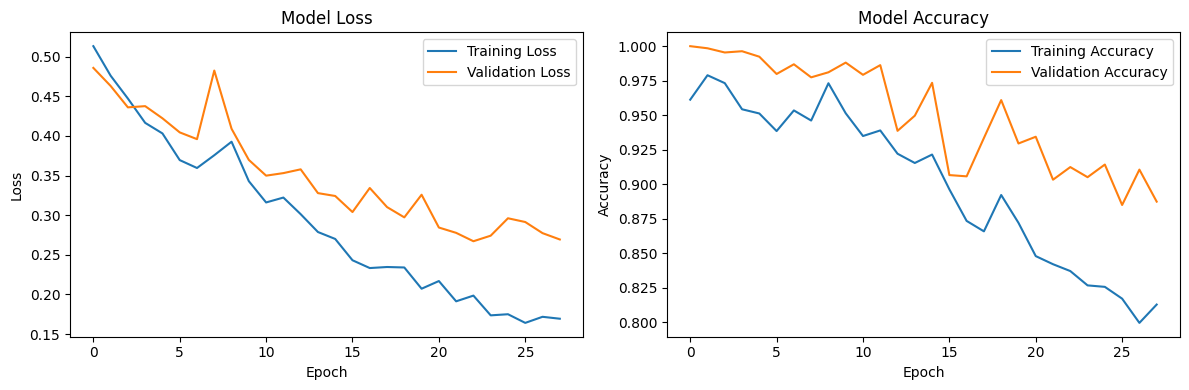

128/128 [==============================] - 20s 138ms/step

Category-wise Performance:
Bilingual Accuracy: 0.8270
Spanish Accuracy: 0.8959
French Accuracy: 0.9071
German Accuracy: 0.9494
Other Accuracy: 0.8741
128/128 [==============================] - 17s 132ms/step - loss: 0.2646 - accuracy: 0.9110

Overall Test Accuracy: 0.9110


In [31]:
import matplotlib.pyplot as plt

# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate performance for each category
y_pred = model.predict(X_test)
categories = ['Bilingual', 'Spanish', 'French', 'German', 'Other']
# categories = ['Spanish']

print("\nCategory-wise Performance:")
for i, category in enumerate(categories):
    category_accuracy = np.mean((y_test[:, i] > 0.5) == (y_pred[:, i] > 0.5))
    print(f"{category} Accuracy: {category_accuracy:.4f}")

# Overall performance
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"\nOverall Test Accuracy: {test_accuracy:.4f}")

In [40]:
def prepare_new_data(new_data, sequence_length=256):
    # Scale the data using the same method as training data
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(new_data)
    
    # Reshape data into sequences
    n_sequences = len(data_scaled) // sequence_length
    sequences = np.array_split(data_scaled[:n_sequences*sequence_length], n_sequences)
    
    # Convert to numpy array and ensure correct shape
    X_new = np.array([seq for seq in sequences if len(seq) == sequence_length])
    
    return X_new

# Load and prepare your new data
new_df = result_dataframes[39]  # Your new EEG data
X_new = prepare_new_data(new_df)

# Make predictions
predictions = model.predict(X_new)

# Convert predictions to labels
# For each sequence, get the predicted categories
predicted_labels = (predictions > 0.5).astype(int)

# Get the most common prediction for all sequences
final_prediction = np.mean(predicted_labels, axis=0)
print("Prediction probabilities:", final_prediction)

# Print the predicted categories
# categories = ['Bilingual', 'Spanish', 'French', 'German', 'Other']
for i, prob in enumerate(final_prediction):
    print(f"{categories[i]}: {prob:.2f}")

20/20 [==============================] - 2s 113ms/step
Prediction probabilities: [0.36935484 0.19193548 0.07580645 0.01612903 0.02580645]
Bilingual: 0.37
Spanish: 0.19
French: 0.08
German: 0.02
Other: 0.03
